In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats
import re
from string import punctuation
import datetime
import math
pd.set_option('max_columns', 200)

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn import metrics, ensemble
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# import category_encoders as ce
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, f1_score, precision_score 
from sklearn.metrics import roc_curve, confusion_matrix, classification_report
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
df = pd.read_csv('train2.csv')
df.head()

Unnamed: 0         S         A       Dis  Distance  Temperature  Humidity  \
0           0 -0.651933 -0.566602  0.828906 -1.667708     0.100321  1.060378   
1           1 -1.569860 -0.341281 -1.851936 -1.667708     0.100321  1.060378   
2           2 -0.991638 -1.119663  0.210251 -1.667708     0.100321  1.060378   
3           3 -1.569860 -1.170872 -1.783196 -1.667708     0.100321  1.060378   
4           4 -0.557972  0.764840 -0.820843 -1.667708     0.100321  1.060378   

   WindSpeed       BMI  TimeDelta  YardLine_std     X_std     Y_std  Dir_std2  \
0   0.405091 -0.684052  -0.565643     -0.515164 -0.504113 -1.148222  1.727092   
1   0.405091  0.834805  -0.565643     -0.515164 -0.534021 -0.844264 -1.419735   
2   0.405091  0.363153  -0.565643     -0.515164 -0.507655 -0.921635 -1.382268   
3   0.405091 -0.291919  -0.565643     -0.515164 -0.407700 -0.161741  1.061989   
4   0.405091 -0.854643  -0.565643     -0.515164 -0.323486 -1.228356  1.607440   

   Dir_rad2  DistanceToBack  Yards  
0 -0.785013       -0.308017    8.0  
1 -0.985574       -0.629235    8.0  
2 -1.023133       -0.483620    8.0  
3 -0.118276       -0.080123    8.0  
4 -0.665067        0.396786    8.0

In [4]:
df = df.drop(columns='Unnamed: 0')
df

S         A       Dis  Distance  Temperature  Humidity  \
0      -0.651933 -0.566602  0.828906 -1.667708     0.100321  1.060378   
1      -1.569860 -0.341281 -1.851936 -1.667708     0.100321  1.060378   
2      -0.991638 -1.119663  0.210251 -1.667708     0.100321  1.060378   
3      -1.569860 -1.170872 -1.783196 -1.667708     0.100321  1.060378   
4      -0.557972  0.764840 -0.820843 -1.667708     0.100321  1.060378   
...          ...       ...       ...       ...          ...       ...   
509729 -0.326683  0.447342 -0.408405 -0.086761    -1.037491  1.007058   
509730 -1.035005 -1.047970 -1.164540 -0.086761    -1.037491  1.007058   
509731 -0.001433 -0.515393 -0.133447 -0.086761    -1.037491  1.007058   
509732  1.277883  0.109361  1.310083 -0.086761    -1.037491  1.007058   
509733  1.646499  2.475231  1.172604 -0.086761    -1.037491  1.007058   

        WindSpeed       BMI  TimeDelta  YardLine_std     X_std     Y_std  \
0        0.405091 -0.684052  -0.565643     -0.515164 -0.504113 -1.148222   
1        0.405091  0.834805  -0.565643     -0.515164 -0.534021 -0.844264   
2        0.405091  0.363153  -0.565643     -0.515164 -0.507655 -0.921635   
3        0.405091 -0.291919  -0.565643     -0.515164 -0.407700 -0.161741   
4        0.405091 -0.854643  -0.565643     -0.515164 -0.323486 -1.228356   
...           ...       ...        ...           ...       ...       ...   
509729  -0.148823 -0.388629   1.567268      1.154134  1.096741 -0.359774   
509730  -0.148823  1.367671   1.567268      1.154134  1.096347  0.051950   
509731  -0.148823  1.293092   1.567268      1.154134  1.116023  0.033989   
509732  -0.148823  1.040707   1.567268      1.154134  1.010165 -0.336286   
509733  -0.148823 -0.220681   1.567268      1.154134  0.861807 -0.062725   

        Dir_std2  Dir_rad2  DistanceToBack  Yards  
0       1.727092 -0.785013       -0.308017    8.0  
1      -1.419735 -0.985574       -0.629235    8.0  
2      -1.382268 -1.023133       -0.483620    8.0  
3       1.061989 -0.118276       -0.080123    8.0  
4       1.607440 -0.665067        0.396786    8.0  
...          ...       ...             ...    ...  
509729 -1.451252 -0.953980       -0.331081   11.0  
509730 -1.195679 -1.210180       -0.386869   11.0  
509731 -1.397236 -1.008128       -0.305134   11.0  
509732  0.110912  0.835136       -0.686242   11.0  
509733 -0.494318  1.441853       -1.410907   11.0  

[509734 rows x 16 columns]

In [5]:
from platform import python_version

print(python_version())

3.6.9


In [6]:
X = df.drop(columns='Yards')
y = df['Yards']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(407787, 15) (101947, 15)
(407787,) (101947,)


In [7]:
colnames = X.columns

In [8]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_hat_test = lr.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_hat_test))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_hat_test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))

Mean Absolute Error: 3.8594460294878434
Mean Squared Error: 41.47937575491447
Root Mean Squared Error: 6.440448412565267


In [9]:
lasso = Lasso(alpha=0.2)

# Fit the regressor to the data
lasso.fit(X,y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

[ 0.          0.          0.          0.01308084 -0.          0.
  0.         -0.          0.         -0.00552793 -0.          0.
 -0.          0.          0.        ]


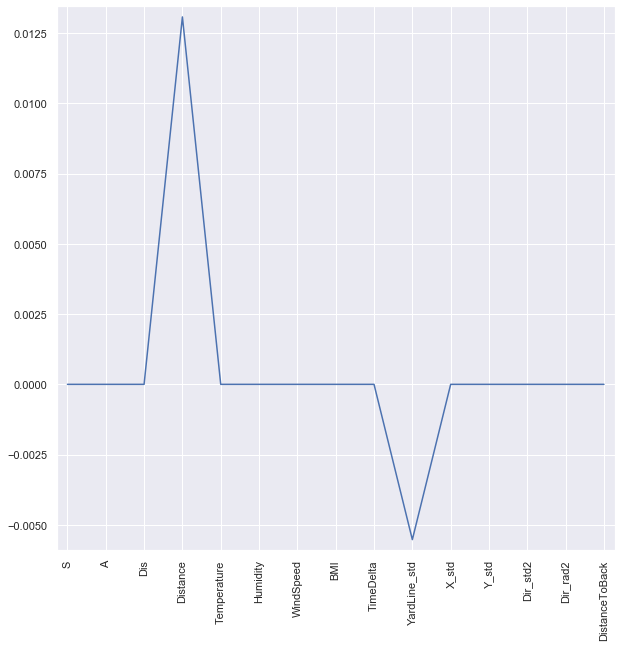

In [12]:
plt.figure(figsize=(10,10))
plt.plot(range(len(colnames)), lasso_coef)
plt.xticks(range(len(colnames)), colnames.values, rotation=90) 
plt.margins(0.02)
plt.show()

In [64]:
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

# find the mean of our cv scores here
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[ 0.00368739  0.00233121  0.00273048 -0.01035477 -0.00761443]
Average 5-Fold CV Score: -0.0018440246736767696


In [66]:
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

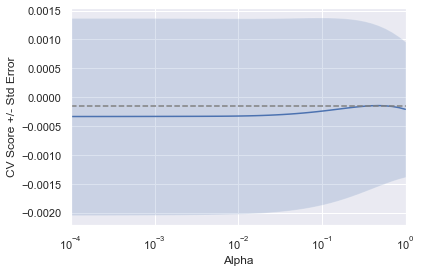

In [67]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

# Display the plot
display_plot(ridge_scores, ridge_scores_std)

In [68]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [69]:
importances = regressor.feature_importances_

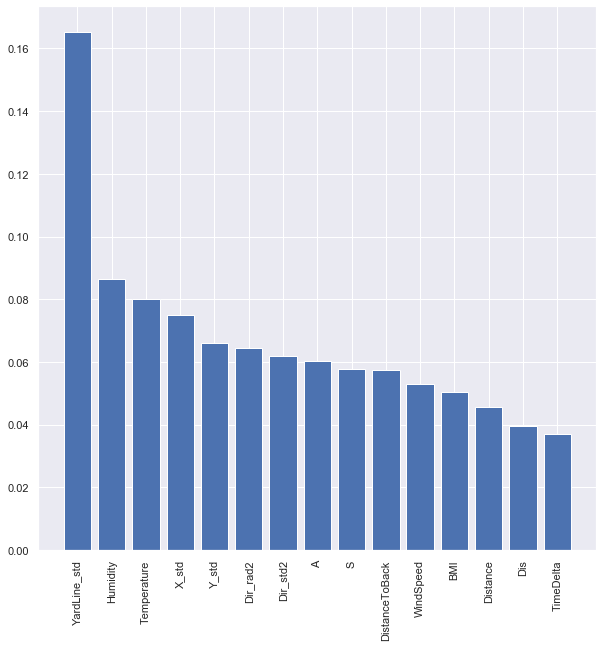

In [70]:
indices = np.argsort(importances)[::-1]
names = [df.columns[i] for i in indices]
plt.figure(figsize=(10,10))
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90);

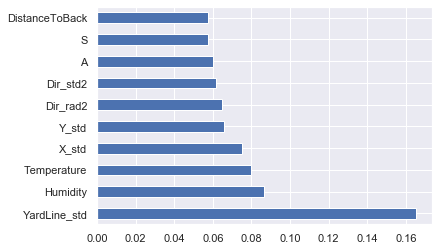

In [73]:
feat_importances = pd.Series(regressor.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [74]:
X2 = X.drop(columns=['Temperature', 'Humidity', 'Dir_rad2'])

In [167]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=.20, random_state=42)

print(X2_train.shape, X2_test.shape)
print(y2_train.shape, y2_test.shape)

(407787, 12) (101947, 12)
(407787,) (101947,)


In [168]:
regressor2 = RandomForestRegressor(n_estimators=20, random_state=12)
regressor2.fit(X2_train, y2_train)
y2_pred = regressor2.predict(X2_test)

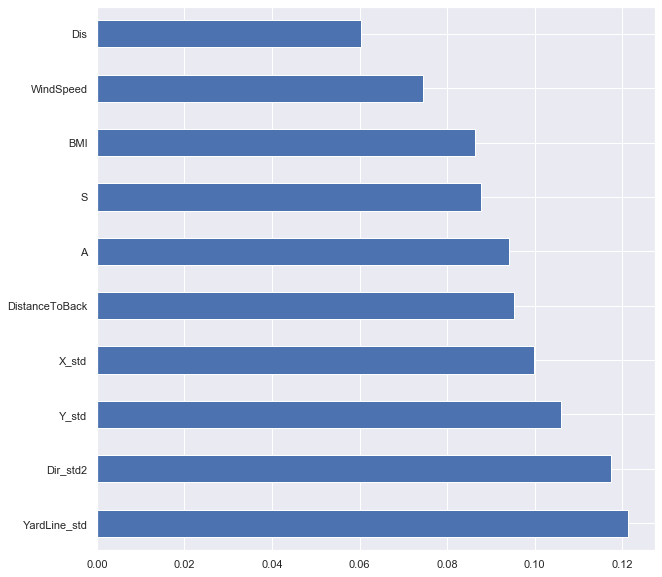

In [169]:
plt.figure(figsize=(10,10))
feat_importances = pd.Series(regressor2.feature_importances_, index=X2.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [166]:
# scores = cross_val_score(regressor2, X2, y, cv=10, scoring='neg_mean_absolute_error')

In [173]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y2_test, y2_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y2_test, y2_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2_test, y2_pred)))
print('R Squared Error:', metrics.r2_score(y2_test, y2_pred))

Mean Absolute Error: 3.4722851089291487
Mean Squared Error: 33.55835103043738
Root Mean Squared Error: 5.792957019557229
R Squared Error: 0.192906601913159


In [174]:
y2_test

306448     2.0
247732     2.0
449409    21.0
220917     0.0
397588     6.0
          ... 
59879     -1.0
122679     5.0
50415      7.0
274696     3.0
419466    -2.0
Name: Yards, Length: 101947, dtype: float64

In [175]:
y2_pred

array([4.05, 2.5 , 5.7 , ..., 7.9 , 3.2 , 4.25])

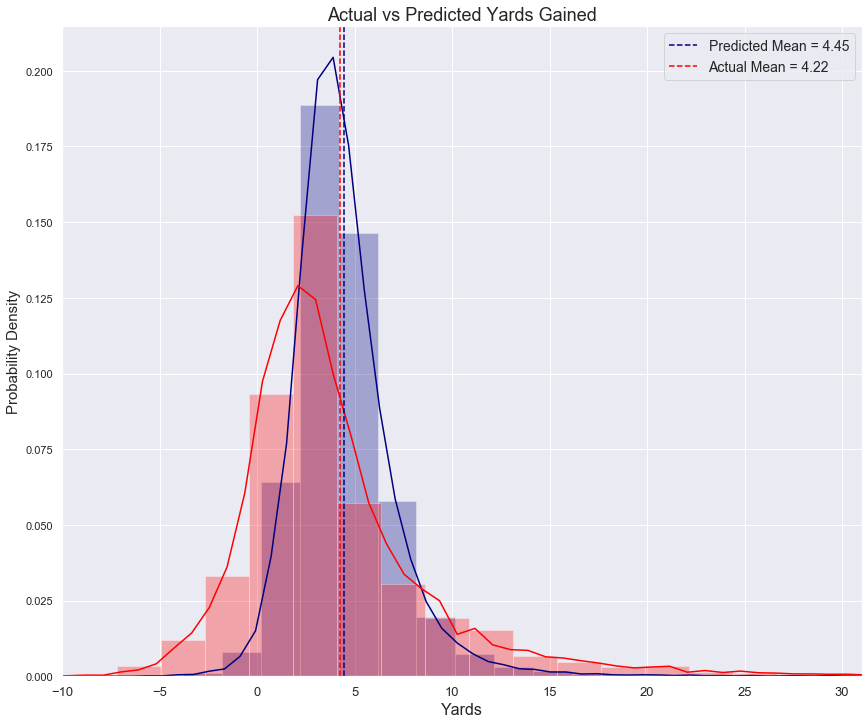

In [236]:
plt.figure(figsize=(12,10))
sns.distplot(y2_pred, color='navy', hist_kws={"alpha": .3})
sns.distplot(y2_test, color='red', hist_kws={"alpha": .3})
plt.axvline(y2_pred.mean(), linestyle='--', color='navy', label='Predicted Mean = 4.45')
plt.axvline(y2_test.mean(), linestyle='--', color='red', label='Actual Mean = 4.22')
plt.xlim(-10, 31)
plt.xlabel('Yards', fontsize=16)
plt.ylabel('Probability Density', fontsize=15)
plt.xticks(fontsize=11)
plt.xticks(range(-10, 31, 5), fontsize=13)
plt.title("Actual vs Predicted Yards Gained", fontsize=18)
plt.legend(fontsize=14)
plt.tight_layout(pad=.4);
# plt.savefig('YdsGained.png')

In [177]:
print('Pred mean:', y2_pred.mean())
print('Actual mean:', y2_test.mean())

Pred mean: 4.454683806291505
Actual mean: 4.21967296732616


In [197]:
y2_test.value_counts()

 2.0     13173
 1.0     12023
 3.0     11619
 4.0     10295
 0.0      9453
         ...  
 77.0        4
-14.0        4
 63.0        3
 92.0        3
 67.0        1
Name: Yards, Length: 94, dtype: int64

In [7]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

In [8]:
def rfr_model(X, y):
    gsc = GridSearchCV(estimator=RandomForestRegressor(),param_grid={
            'max_depth': range(3,7), 'n_estimators': (10, 50, 100, 1000), }, 
                       cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    
    rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], random_state=2119)

    scores = cross_val_score(rfr, X, y, cv=10, scoring='neg_mean_absolute_error')

    return scores

In [ ]:
# %time
# rfr_model(X_train, y_train)

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.06 µs


In [ ]:
scores = cross_val_score(rfr, X, y, cv=10, scoring='neg_mean_absolute_error')

In [15]:
from sklearn.model_selection import GridSearchCV
classifier = RandomForestClassifier(n_estimators=300, random_state=42)

In [16]:
grid_param = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

In [107]:
gd_sr = GridSearchCV(estimator=classifier,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)

In [ ]:
# gd_sr.fit(X_train, y_train)

In [5]:
from platform import python_version

print(python_version())

3.6.9


In [8]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [18]:
# model = XGBClassifier()
# model.fit(X_train, y_train)

In [14]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
y_hat_probas2 = model.predict_proba(X_test)

In [15]:
accuracy_score(y_test, y_predict)

0.6558702070683786

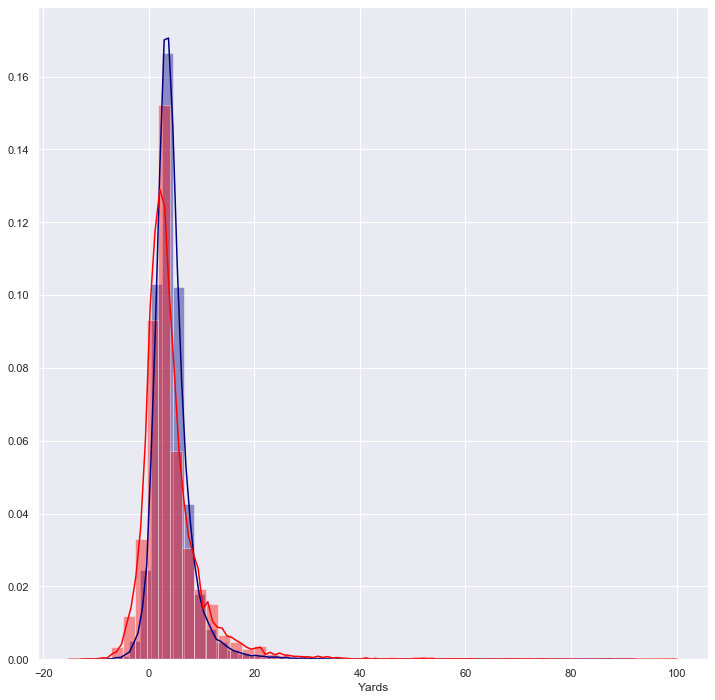

In [32]:
plt.figure(figsize=(12,12))
sns.distplot(y_pred, color='navy')
sns.distplot(y_test, color='red')

In [40]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score, make_scorer

# regressor = RandomForestRegressor(n_estimators=300, random_state=42)
# param_grid = {'n_estimators': [10, 100, 1000]}
# clf = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring=make_scorer(accuracy_score))

In [43]:
# grid_param = {
#     'n_estimators': [100, 300, 500, 800, 1000],
#     'bootstrap': [True, False]
# }

In [44]:
# gd_sr = GridSearchCV(estimator=regressor,
#                      param_grid=grid_param,
#                      scoring='accuracy',
#                      cv=5,
#                      n_jobs=-1)

In [19]:
# gd_sr.fit(X_train, y_train)
# gs_pred = clf.predict(X_test)

In [8]:
# importances = clf.feature_importances

In [49]:
df.corr()

S         A       Dis  Distance  Temperature  Humidity  \
S               1.000000  0.334327  0.930016  0.040455     0.020562 -0.005952   
A               0.334327  1.000000  0.279501  0.039614     0.004576  0.007430   
Dis             0.930016  0.279501  1.000000  0.036123     0.023255 -0.016404   
Distance        0.040455  0.039614  0.036123  1.000000     0.027994 -0.006931   
Temperature     0.020562  0.004576  0.023255  0.027994     1.000000 -0.200202   
Humidity       -0.005952  0.007430 -0.016404 -0.006931    -0.200202  1.000000   
WindSpeed      -0.001602 -0.000430 -0.004735  0.013737    -0.235952  0.159843   
BMI            -0.256742 -0.323582 -0.235958 -0.019512    -0.007234  0.008378   
TimeDelta       0.081450  0.003580  0.060297  0.041599    -0.028759 -0.011835   
YardLine_std   -0.038528 -0.020003 -0.034712 -0.276535    -0.023362  0.008480   
X_std          -0.067096 -0.016241 -0.064738 -0.267317    -0.023383  0.008326   
Y_std           0.006913  0.008215  0.007348  0.000124     0.004252 -0.001413   
Dir_std2       -0.070229 -0.031114 -0.065606 -0.018012     0.007013 -0.000414   
Dir_rad2        0.005256  0.011162  0.007329  0.005298    -0.003599  0.004881   
DistanceToBack -0.009296  0.169299 -0.019225  0.060930    -0.002143 -0.002650   
Yards           0.004353  0.019282  0.002545  0.033345    -0.011607  0.003363   

                WindSpeed       BMI  TimeDelta  YardLine_std     X_std  \
S               -0.001602 -0.256742   0.081450     -0.038528 -0.067096   
A               -0.000430 -0.323582   0.003580     -0.020003 -0.016241   
Dis             -0.004735 -0.235958   0.060297     -0.034712 -0.064738   
Distance         0.013737 -0.019512   0.041599     -0.276535 -0.267317   
Temperature     -0.235952 -0.007234  -0.028759     -0.023362 -0.023383   
Humidity         0.159843  0.008378  -0.011835      0.008480  0.008326   
WindSpeed        1.000000  0.007274   0.000701     -0.000115  0.000125   
BMI              0.007274  1.000000   0.003312      0.009258 -0.041770   
TimeDelta        0.000701  0.003312   1.000000     -0.043291 -0.042463   
YardLine_std    -0.000115  0.009258  -0.043291      1.000000  0.985723   
X_std            0.000125 -0.041770  -0.042463      0.985723  1.000000   
Y_std           -0.001214 -0.006613  -0.000282      0.003184  0.003510   
Dir_std2         0.000585  0.043022  -0.000658      0.019601  0.008736   
Dir_rad2         0.001783 -0.016336  -0.000402      0.000300  0.002424   
DistanceToBack  -0.003845 -0.516746   0.011535     -0.039561  0.092984   
Yards            0.004623 -0.006204   0.009940     -0.032496 -0.030073   

                   Y_std  Dir_std2  Dir_rad2  DistanceToBack     Yards  
S               0.006913 -0.070229  0.005256       -0.009296  0.004353  
A               0.008215 -0.031114  0.011162        0.169299  0.019282  
Dis             0.007348 -0.065606  0.007329       -0.019225  0.002545  
Distance        0.000124 -0.018012  0.005298        0.060930  0.033345  
Temperature     0.004252  0.007013 -0.003599       -0.002143 -0.011607  
Humidity       -0.001413 -0.000414  0.004881       -0.002650  0.003363  
WindSpeed      -0.001214  0.000585  0.001783       -0.003845  0.004623  
BMI            -0.006613  0.043022 -0.016336       -0.516746 -0.006204  
TimeDelta      -0.000282 -0.000658 -0.000402        0.011535  0.009940  
YardLine_std    0.003184  0.019601  0.000300       -0.039561 -0.032496  
X_std           0.003510  0.008736  0.002424        0.092984 -0.030073  
Y_std           1.000000 -0.001732 -0.029627        0.023035  0.002454  
Dir_std2       -0.001732  1.000000  0.136956       -0.165112 -0.012851  
Dir_rad2       -0.029627  0.136956  1.000000        0.012723  0.001756  
DistanceToBack  0.023035 -0.165112  0.012723        1.000000  0.015489  
Yards           0.002454 -0.012851  0.001756        0.015489  1.000000

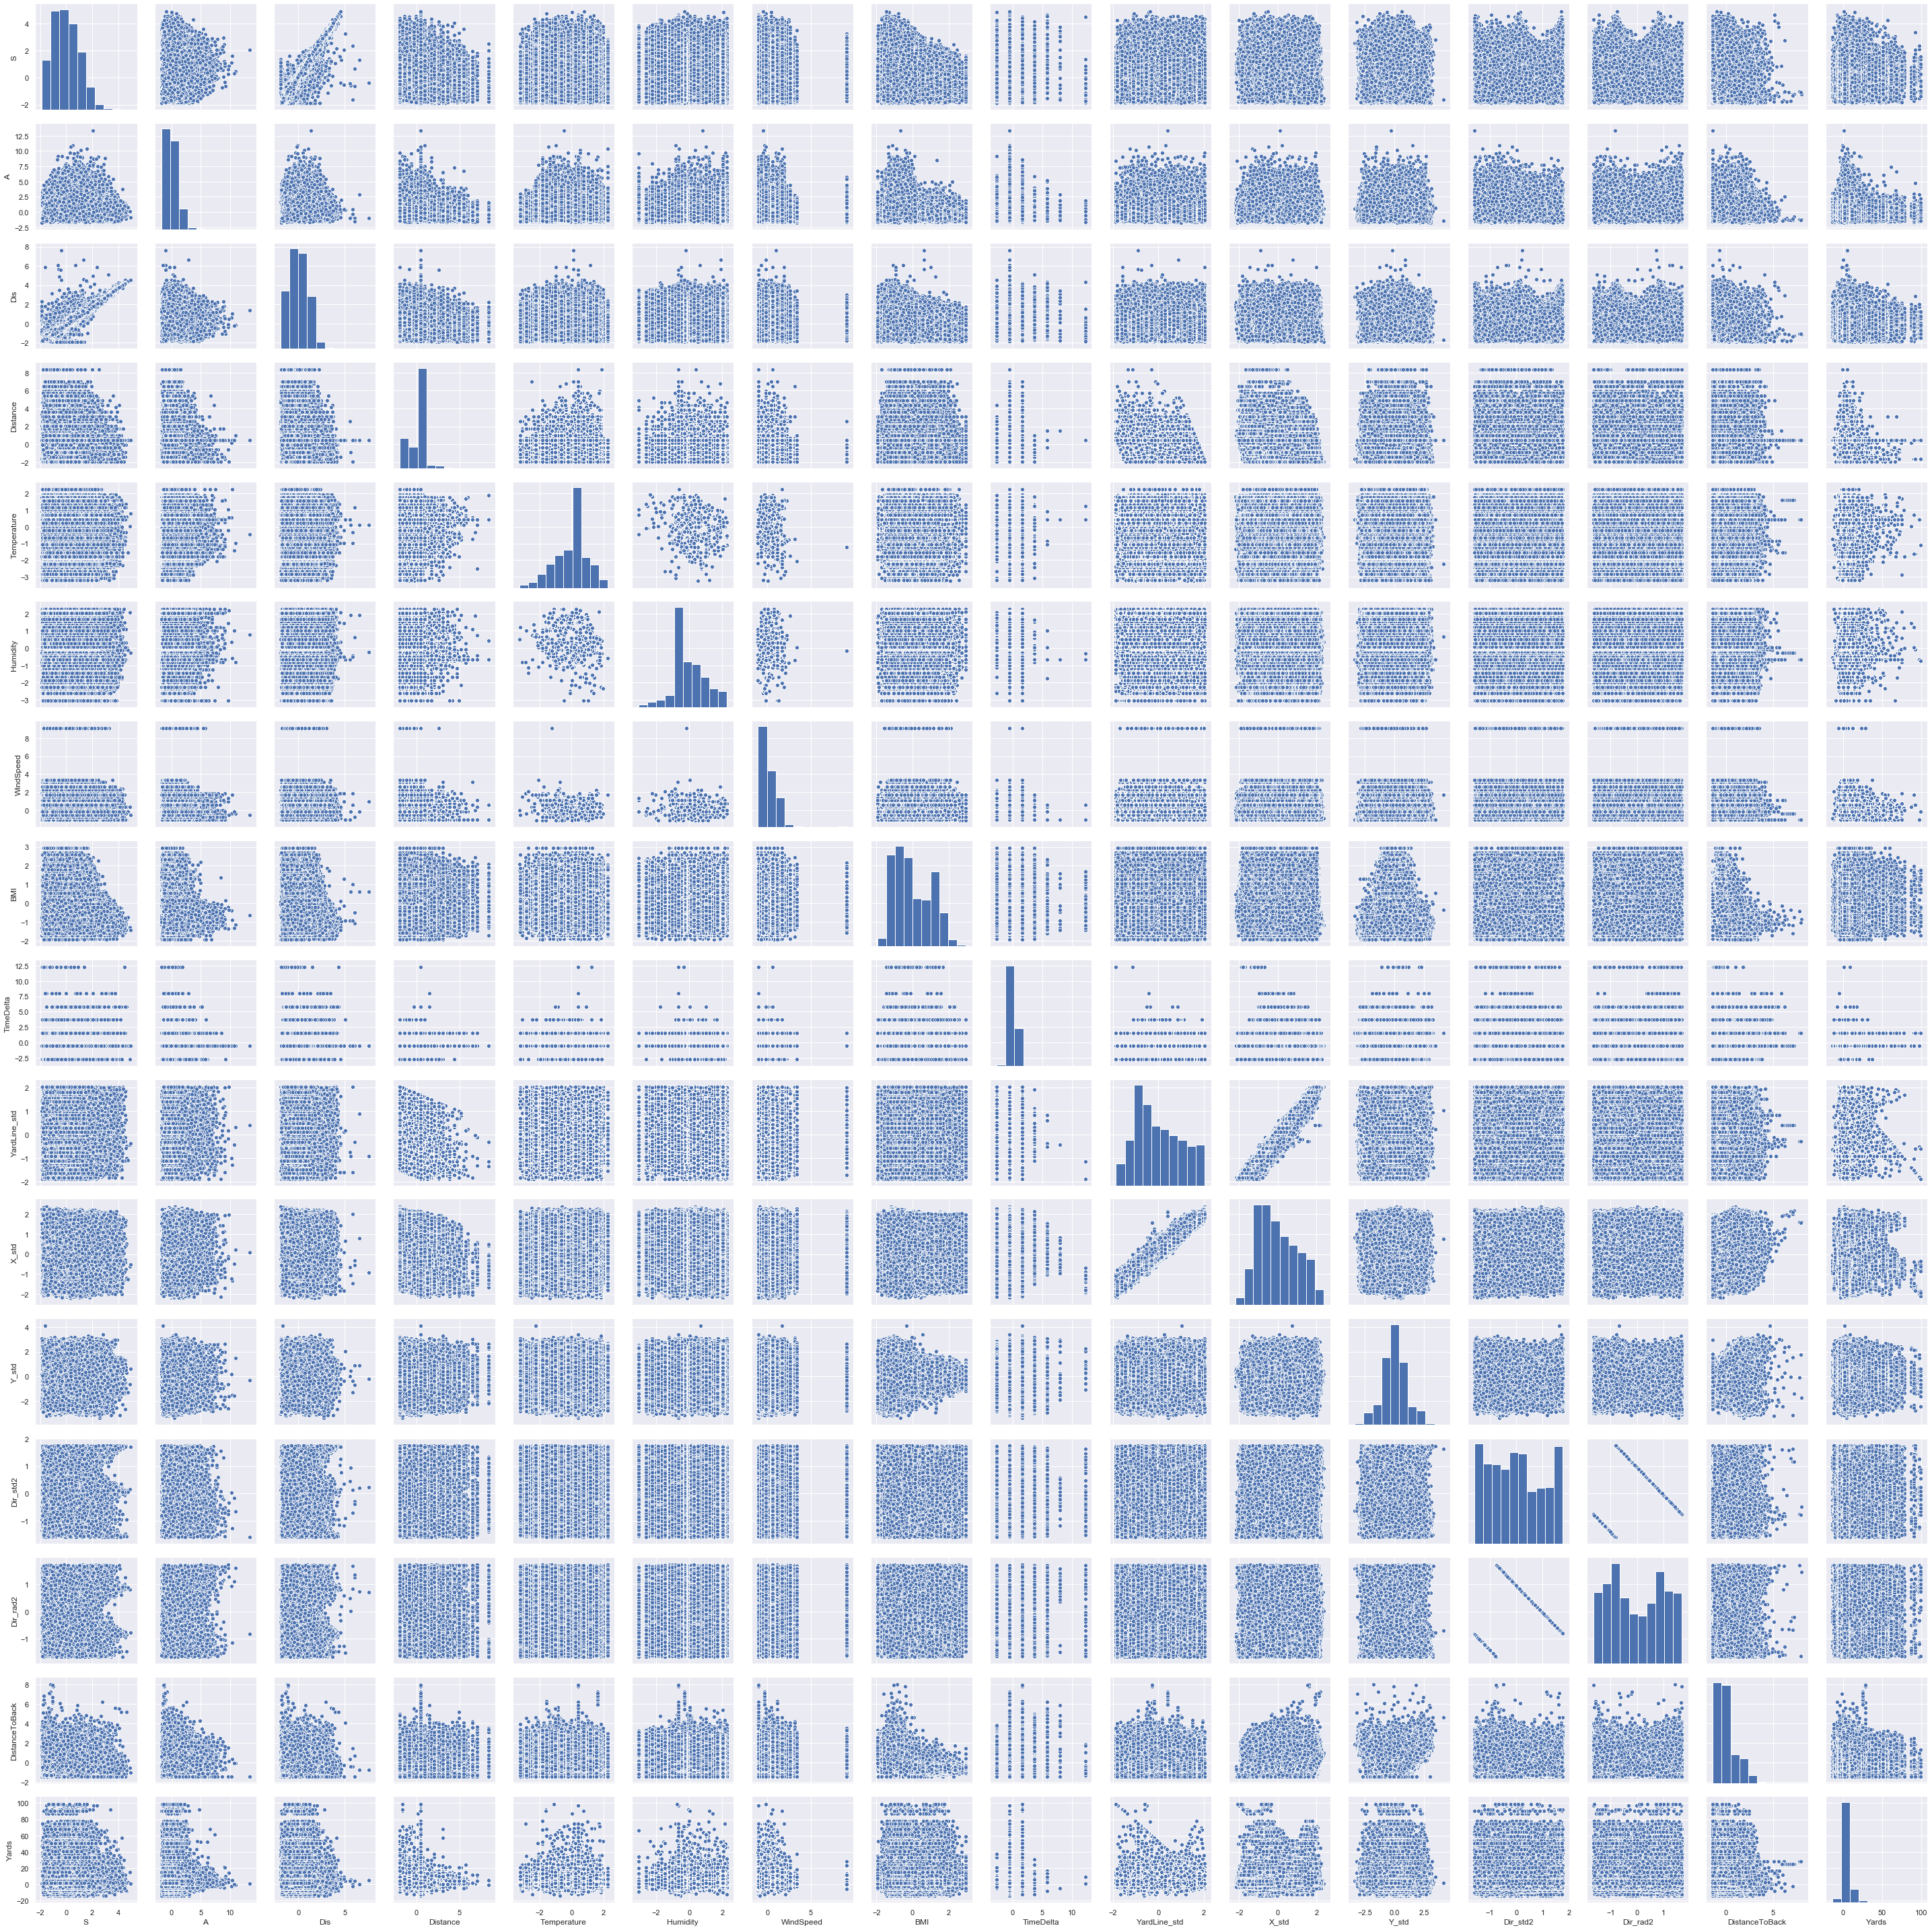

In [50]:
# sns.pairplot(df)

In [9]:
df.head()

S         A       Dis  Distance  Temperature  Humidity  WindSpeed  \
0 -0.651933 -0.566602  0.828906 -1.667708     0.100321  1.060378   0.405091   
1 -1.569860 -0.341281 -1.851936 -1.667708     0.100321  1.060378   0.405091   
2 -0.991638 -1.119663  0.210251 -1.667708     0.100321  1.060378   0.405091   
3 -1.569860 -1.170872 -1.783196 -1.667708     0.100321  1.060378   0.405091   
4 -0.557972  0.764840 -0.820843 -1.667708     0.100321  1.060378   0.405091   

        BMI  TimeDelta  YardLine_std     X_std     Y_std  Dir_std2  Dir_rad2  \
0 -0.684052  -0.565643     -0.515164 -0.504113 -1.148222  1.727092 -0.785013   
1  0.834805  -0.565643     -0.515164 -0.534021 -0.844264 -1.419735 -0.985574   
2  0.363153  -0.565643     -0.515164 -0.507655 -0.921635 -1.382268 -1.023133   
3 -0.291919  -0.565643     -0.515164 -0.407700 -0.161741  1.061989 -0.118276   
4 -0.854643  -0.565643     -0.515164 -0.323486 -1.228356  1.607440 -0.665067   

   DistanceToBack  Yards  
0       -0.308017    8.0  
1       -0.629235    8.0  
2       -0.483620    8.0  
3       -0.080123    8.0  
4        0.396786    8.0

In [9]:
X = df.copy()
yards = X.Yards

y = np.zeros((yards.shape[0], 199))
for idx, target in enumerate(list(yards)):
    y[int(idx)][int(99 + target)] = 1

# X.drop(['GameId','PlayId','Yards'], axis=1, inplace=True)

In [25]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
X

S         A       Dis  Distance  Temperature  Humidity  \
0      -0.651933 -0.566602  0.828906 -1.667708     0.100321  1.060378   
1      -1.569860 -0.341281 -1.851936 -1.667708     0.100321  1.060378   
2      -0.991638 -1.119663  0.210251 -1.667708     0.100321  1.060378   
3      -1.569860 -1.170872 -1.783196 -1.667708     0.100321  1.060378   
4      -0.557972  0.764840 -0.820843 -1.667708     0.100321  1.060378   
...          ...       ...       ...       ...          ...       ...   
509729 -0.326683  0.447342 -0.408405 -0.086761    -1.037491  1.007058   
509730 -1.035005 -1.047970 -1.164540 -0.086761    -1.037491  1.007058   
509731 -0.001433 -0.515393 -0.133447 -0.086761    -1.037491  1.007058   
509732  1.277883  0.109361  1.310083 -0.086761    -1.037491  1.007058   
509733  1.646499  2.475231  1.172604 -0.086761    -1.037491  1.007058   

        WindSpeed       BMI  TimeDelta  YardLine_std     X_std     Y_std  \
0        0.405091 -0.684052  -0.565643     -0.515164 -0.504113 -1.148222   
1        0.405091  0.834805  -0.565643     -0.515164 -0.534021 -0.844264   
2        0.405091  0.363153  -0.565643     -0.515164 -0.507655 -0.921635   
3        0.405091 -0.291919  -0.565643     -0.515164 -0.407700 -0.161741   
4        0.405091 -0.854643  -0.565643     -0.515164 -0.323486 -1.228356   
...           ...       ...        ...           ...       ...       ...   
509729  -0.148823 -0.388629   1.567268      1.154134  1.096741 -0.359774   
509730  -0.148823  1.367671   1.567268      1.154134  1.096347  0.051950   
509731  -0.148823  1.293092   1.567268      1.154134  1.116023  0.033989   
509732  -0.148823  1.040707   1.567268      1.154134  1.010165 -0.336286   
509733  -0.148823 -0.220681   1.567268      1.154134  0.861807 -0.062725   

        Dir_std2  Dir_rad2  DistanceToBack  Yards  
0       1.727092 -0.785013       -0.308017    8.0  
1      -1.419735 -0.985574       -0.629235    8.0  
2      -1.382268 -1.023133       -0.483620    8.0  
3       1.061989 -0.118276       -0.080123    8.0  
4       1.607440 -0.665067        0.396786    8.0  
...          ...       ...             ...    ...  
509729 -1.451252 -0.953980       -0.331081   11.0  
509730 -1.195679 -1.210180       -0.386869   11.0  
509731 -1.397236 -1.008128       -0.305134   11.0  
509732  0.110912  0.835136       -0.686242   11.0  
509733 -0.494318  1.441853       -1.410907   11.0  

[509734 rows x 16 columns]

# /// NEURAL NETWORK ///

In [10]:
X = df.drop(columns='Yards')
# y = df['Yards']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(407787, 15) (101947, 15)
(407787, 199) (101947, 199)


In [11]:
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import Callback, EarlyStopping

Using TensorFlow backend.


In [12]:
class Metric(Callback):
    def __init__(self, model, callbacks, data):
        super().__init__()
        self.model = model
        self.callbacks = callbacks
        self.data = data

    def on_train_begin(self, logs=None):
        for callback in self.callbacks:
            callback.on_train_begin(logs)

    def on_train_end(self, logs=None):
        for callback in self.callbacks:
            callback.on_train_end(logs)

    def on_epoch_end(self, batch, logs=None):
        X_train, y_train = self.data[0][0], self.data[0][1]
        y_pred = self.model.predict(X_train)
        y_true = np.clip(np.cumsum(y_train, axis=1), 0, 1)
        y_pred = np.clip(np.cumsum(y_pred, axis=1), 0, 1)
        tr_s = ((y_true - y_pred) ** 2).sum(axis=1).sum(axis=0) / (199 * X_train.shape[0])
        tr_s = np.round(tr_s, 6)
        logs['tr_CRPS'] = tr_s

        X_valid, y_valid = self.data[1][0], self.data[1][1]

        y_pred = self.model.predict(X_valid)
        y_true = np.clip(np.cumsum(y_valid, axis=1), 0, 1)
        y_pred = np.clip(np.cumsum(y_pred, axis=1), 0, 1)
        val_s = ((y_true - y_pred) ** 2).sum(axis=1).sum(axis=0) / (199 * X_valid.shape[0])
        val_s = np.round(val_s, 6)
        logs['val_CRPS'] = val_s
        print('tr CRPS', tr_s, 'val CRPS', val_s)

        for callback in self.callbacks:
            callback.on_epoch_end(batch, logs)

In [13]:
model = Sequential()
model.add(Dense(512, input_dim=X.shape[1], activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(199, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               8192      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 199)               51143     
Total params: 190,663
Trainable params: 190,663
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=[])

In [16]:
es = EarlyStopping(monitor='val_CRPS', 
                   mode='min',
                   restore_best_weights=True, 
                   verbose=2, 
                   patience=5)
es.set_model(model)

In [17]:
metric = Metric(model, [es], [(X_train,y_train), (X_test,y_test)])

In [18]:
%%time
model.fit(X_train, y_train, callbacks=[metric], epochs=10, batch_size=1024)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
407787/407787 [==============================] - 22s 53us/step - loss: 2.9378
tr CRPS 0.014012 val CRPS 0.013997
Epoch 2/10
407787/407787 [==============================] - 22s 53us/step - loss: 2.8531
tr CRPS 0.013985 val CRPS 0.013979
Epoch 3/10
407787/407787 [==============================] - 22s 53us/step - loss: 2.8347
tr CRPS 0.013935 val CRPS 0.013929
Epoch 4/10
407787/407787 [==============================] - 21s 52us/step - loss: 2.8178
tr CRPS 0.01391 val CRPS 0.013907
Epoch 5/10
407787/407787 [==============================] - 24s 58us/step - loss: 2.8021
tr CRPS 0.0139 val CRPS 0.013908
Epoch 6/10
407787/407787 [==============================] - 21s 52us/step - loss: 2.7858 0s - l
tr CRPS 0.013847 val CRPS 0.013862
Epoch 7/10
407787/407787 [==============================] - 21s 51us/step - loss: 2.7710
tr CRPS 0.013808 val CRPS 0.013842
Epoch 8/10
407787/407787 [==============================] - 22s 54us/step - loss

In [38]:
# for (test_df, sample_prediction_df) in iter_test:
#     basetable = create_features(test_df, deploy=True)
#     basetable.drop(['GameId','PlayId'], axis=1, inplace=True)
#     scaled_basetable = scaler.transform(basetable)
    
#     y_pred = model.predict(scaled_basetable)
#     y_pred = np.clip(np.cumsum(y_pred, axis=1), 0, 1).tolist()[0]
    
#     preds_df = pd.DataFrame(data=[y_pred], columns=sample_prediction_df.columns)
#     env.predict(preds_df)

In [19]:
Yards = 'Yards'

In [20]:
y_preds = model.predict(X_test)
y_preds = np.clip(np.cumsum(y_preds, axis=1), 0, 1).tolist()[0]
y_preds = [round(x, 2) for x in y_preds]
preds_df = pd.DataFrame(data=[y_preds])

In [21]:
preds_df

0    1    2    3    4    5    6    7    8    9   10   11   12   13   14  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    15   16   17   18   19   20   21   22   23   24   25   26   27   28   29  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    30   31   32   33   34   35   36   37   38   39   40   41   42   43   44  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    45   46   47   48   49   50   51   52   53   54   55   56   57   58   59  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    60   61   62   63   64   65   66   67   68   69   70   71   72   73   74  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    75   76   77   78   79   80   81   82   83   84   85   86   87   88   89  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    90   91   92   93    94    95    96    97    98    99   100   101   102  \
0  0.0  0.0  0.0  0.0  0.01  0.02  0.04  0.07  0.11  0.19  0.32  0.44  0.53   

    103   104   105   106   107  108   109   110   111   112   113   114  \
0  0.66  0.74  0.79  0.83  0.88  0.9  0.92  0.93  0.94  0.95  0.95  0.96   

    115   116   117   118   119   120   121   122   123   124   125   126  \
0  0.97  0.97  0.98  0.98  0.98  0.99  0.99  0.99  0.99  0.99  0.99  0.99   

    127   128   129  130  131  132  133  134  135  136  137  138  139  140  \
0  0.99  0.99  0.99  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   

   141  142  143  144  145  146  147  148  149  150  151  152  153  154  155  \
0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   

   156  157  158  159  160  161  162  163  164  165  166  167  168  169  170  \
0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   

   171  172  173  174  175  176  177  178  179  180  181  182  183  184  185  \
0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   

   186  187  188  189  190  191  192  193  194  195  196  197  198  
0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [22]:
preds_df2 = preds_df.copy()

In [23]:
preds_df3 = preds_df.rename(columns=lambda x : x - 99)

In [24]:
preds_df4 = preds_df3.rename(columns=lambda x : str(x) + f' {Yards}')
preds_df4

-99 Yards  -98 Yards  -97 Yards  -96 Yards  -95 Yards  -94 Yards  \
0        0.0        0.0        0.0        0.0        0.0        0.0   

   -93 Yards  -92 Yards  -91 Yards  -90 Yards  -89 Yards  -88 Yards  \
0        0.0        0.0        0.0        0.0        0.0        0.0   

   -87 Yards  -86 Yards  -85 Yards  -84 Yards  -83 Yards  -82 Yards  \
0        0.0        0.0        0.0        0.0        0.0        0.0   

   -81 Yards  -80 Yards  -79 Yards  -78 Yards  -77 Yards  -76 Yards  \
0        0.0        0.0        0.0        0.0        0.0        0.0   

   -75 Yards  -74 Yards  -73 Yards  -72 Yards  -71 Yards  -70 Yards  \
0        0.0        0.0        0.0        0.0        0.0        0.0   

   -69 Yards  -68 Yards  -67 Yards  -66 Yards  -65 Yards  -64 Yards  \
0        0.0        0.0        0.0        0.0        0.0        0.0   

   -63 Yards  -62 Yards  -61 Yards  -60 Yards  -59 Yards  -58 Yards  \
0        0.0        0.0        0.0        0.0        0.0        0.0   

   -57 Yards  -56 Yards  -55 Yards  -54 Yards  -53 Yards  -52 Yards  \
0        0.0        0.0        0.0        0.0        0.0        0.0   

   -51 Yards  -50 Yards  -49 Yards  -48 Yards  -47 Yards  -46 Yards  \
0        0.0        0.0        0.0        0.0        0.0        0.0   

   -45 Yards  -44 Yards  -43 Yards  -42 Yards  -41 Yards  -40 Yards  \
0        0.0        0.0        0.0        0.0        0.0        0.0   

   -39 Yards  -38 Yards  -37 Yards  -36 Yards  -35 Yards  -34 Yards  \
0        0.0        0.0        0.0        0.0        0.0        0.0   

   -33 Yards  -32 Yards  -31 Yards  -30 Yards  -29 Yards  -28 Yards  \
0        0.0        0.0        0.0        0.0        0.0        0.0   

   -27 Yards  -26 Yards  -25 Yards  -24 Yards  -23 Yards  -22 Yards  \
0        0.0        0.0        0.0        0.0        0.0        0.0   

   -21 Yards  -20 Yards  -19 Yards  -18 Yards  -17 Yards  -16 Yards  \
0        0.0        0.0        0.0        0.0        0.0        0.0   

   -15 Yards  -14 Yards  -13 Yards  -12 Yards  -11 Yards  -10 Yards  -9 Yards  \
0        0.0        0.0        0.0        0.0        0.0        0.0       0.0   

   -8 Yards  -7 Yards  -6 Yards  -5 Yards  -4 Yards  -3 Yards  -2 Yards  \
0       0.0       0.0       0.0      0.01      0.02      0.04      0.07   

   -1 Yards  0 Yards  1 Yards  2 Yards  3 Yards  4 Yards  5 Yards  6 Yards  \
0      0.11     0.19     0.32     0.44     0.53     0.66     0.74     0.79   

   7 Yards  8 Yards  9 Yards  10 Yards  11 Yards  12 Yards  13 Yards  \
0     0.83     0.88      0.9      0.92      0.93      0.94      0.95   

   14 Yards  15 Yards  16 Yards  17 Yards  18 Yards  19 Yards  20 Yards  \
0      0.95      0.96      0.97      0.97      0.98      0.98      0.98   

   21 Yards  22 Yards  23 Yards  24 Yards  25 Yards  26 Yards  27 Yards  \
0      0.99      0.99      0.99      0.99      0.99      0.99      0.99   

   28 Yards  29 Yards  30 Yards  31 Yards  32 Yards  33 Yards  34 Yards  \
0      0.99      0.99      0.99       1.0       1.0       1.0       1.0   

   35 Yards  36 Yards  37 Yards  38 Yards  39 Yards  40 Yards  41 Yards  \
0       1.0       1.0       1.0       1.0       1.0       1.0       1.0   

   42 Yards  43 Yards  44 Yards  45 Yards  46 Yards  47 Yards  48 Yards  \
0       1.0       1.0       1.0       1.0       1.0       1.0       1.0   

   49 Yards  50 Yards  51 Yards  52 Yards  53 Yards  54 Yards  55 Yards  \
0       1.0       1.0       1.0       1.0       1.0       1.0       1.0   

   56 Yards  57 Yards  58 Yards  59 Yards  60 Yards  61 Yards  62 Yards  \
0       1.0       1.0       1.0       1.0       1.0       1.0       1.0   

   63 Yards  64 Yards  65 Yards  66 Yards  67 Yards  68 Yards  69 Yards  \
0       1.0       1.0       1.0       1.0       1.0       1.0       1.0   

   70 Yards  71 Yards  72 Yards  73 Yards  74 Yards  75 Yards  76 Yards  \
0       1.0       1.0       1.0       1.0       1.0       1.0       1.0   

   77 Yards  78 Yards  79 

In [94]:
y_pred = np.zeros((101947//22,199))
y_ans = np.zeros((101947//22,199))

for i,p in enumerate(y_test):
    p+=99
    for j in range(199):
        if j>=p+10:
            y_pred[i][j]=1.0
        elif j>=p-10:
            y_pred[i][j]=(j+10-p)*0.05

for i,p in enumerate(y_preds2):
    p+=99
    for j in range(199):
        if j>=p:
            y_ans[i][j]=1.0

print("validation score:",np.sum(np.power(y_pred-y_ans,2))/(199*(509762//22)))

In [25]:
y_preds2 = model.predict(X_test)

In [29]:
len(y_test)

101947

In [87]:
yt1 = np.clip(np.cumsum(y_test, axis=1), 0, 1).tolist()[1]

In [91]:
test_df = pd.DataFrame(yt1).T
test_df

0    1    2    3    4    5    6    7    8    9   10   11   12   13   14  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    15   16   17   18   19   20   21   22   23   24   25   26   27   28   29  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    30   31   32   33   34   35   36   37   38   39   40   41   42   43   44  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    45   46   47   48   49   50   51   52   53   54   55   56   57   58   59  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    60   61   62   63   64   65   66   67   68   69   70   71   72   73   74  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    75   76   77   78   79   80   81   82   83   84   85   86   87   88   89  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    90   91   92   93   94   95   96   97   98   99  100  101  102  103  104  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0   

   105  106  107  108  109  110  111  112  113  114  115  116  117  118  119  \
0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   

   120  121  122  123  124  125  126  127  128  129  130  131  132  133  134  \
0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   

   135  136  137  138  139  140  141  142  143  144  145  146  147  148  149  \
0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   

   150  151  152  153  154  155  156  157  158  159  160  161  162  163  164  \
0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   

   165  166  167  168  169  170  171  172  173  174  175  176  177  178  179  \
0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   

   180  181  182  183  184  185  186  187  188  189  190  191  192  193  194  \
0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   

   195  196  197  198  
0  1.0  1.0  1.0  1.0

In [92]:
test_df = test_df.rename(columns=lambda x : x - 99)
test_df = test_df.rename(columns=lambda x : str(x) + f' {Yards}')
test_df

-99 Yards  -98 Yards  -97 Yards  -96 Yards  -95 Yards  -94 Yards  \
0        0.0        0.0        0.0        0.0        0.0        0.0   

   -93 Yards  -92 Yards  -91 Yards  -90 Yards  -89 Yards  -88 Yards  \
0        0.0        0.0        0.0        0.0        0.0        0.0   

   -87 Yards  -86 Yards  -85 Yards  -84 Yards  -83 Yards  -82 Yards  \
0        0.0        0.0        0.0        0.0        0.0        0.0   

   -81 Yards  -80 Yards  -79 Yards  -78 Yards  -77 Yards  -76 Yards  \
0        0.0        0.0        0.0        0.0        0.0        0.0   

   -75 Yards  -74 Yards  -73 Yards  -72 Yards  -71 Yards  -70 Yards  \
0        0.0        0.0        0.0        0.0        0.0        0.0   

   -69 Yards  -68 Yards  -67 Yards  -66 Yards  -65 Yards  -64 Yards  \
0        0.0        0.0        0.0        0.0        0.0        0.0   

   -63 Yards  -62 Yards  -61 Yards  -60 Yards  -59 Yards  -58 Yards  \
0        0.0        0.0        0.0        0.0        0.0        0.0   

   -57 Yards  -56 Yards  -55 Yards  -54 Yards  -53 Yards  -52 Yards  \
0        0.0        0.0        0.0        0.0        0.0        0.0   

   -51 Yards  -50 Yards  -49 Yards  -48 Yards  -47 Yards  -46 Yards  \
0        0.0        0.0        0.0        0.0        0.0        0.0   

   -45 Yards  -44 Yards  -43 Yards  -42 Yards  -41 Yards  -40 Yards  \
0        0.0        0.0        0.0        0.0        0.0        0.0   

   -39 Yards  -38 Yards  -37 Yards  -36 Yards  -35 Yards  -34 Yards  \
0        0.0        0.0        0.0        0.0        0.0        0.0   

   -33 Yards  -32 Yards  -31 Yards  -30 Yards  -29 Yards  -28 Yards  \
0        0.0        0.0        0.0        0.0        0.0        0.0   

   -27 Yards  -26 Yards  -25 Yards  -24 Yards  -23 Yards  -22 Yards  \
0        0.0        0.0        0.0        0.0        0.0        0.0   

   -21 Yards  -20 Yards  -19 Yards  -18 Yards  -17 Yards  -16 Yards  \
0        0.0        0.0        0.0        0.0        0.0        0.0   

   -15 Yards  -14 Yards  -13 Yards  -12 Yards  -11 Yards  -10 Yards  -9 Yards  \
0        0.0        0.0        0.0        0.0        0.0        0.0       0.0   

   -8 Yards  -7 Yards  -6 Yards  -5 Yards  -4 Yards  -3 Yards  -2 Yards  \
0       0.0       0.0       0.0       0.0       0.0       0.0       0.0   

   -1 Yards  0 Yards  1 Yards  2 Yards  3 Yards  4 Yards  5 Yards  6 Yards  \
0       0.0      0.0      0.0      1.0      1.0      1.0      1.0      1.0   

   7 Yards  8 Yards  9 Yards  10 Yards  11 Yards  12 Yards  13 Yards  \
0      1.0      1.0      1.0       1.0       1.0       1.0       1.0   

   14 Yards  15 Yards  16 Yards  17 Yards  18 Yards  19 Yards  20 Yards  \
0       1.0       1.0       1.0       1.0       1.0       1.0       1.0   

   21 Yards  22 Yards  23 Yards  24 Yards  25 Yards  26 Yards  27 Yards  \
0       1.0       1.0       1.0       1.0       1.0       1.0       1.0   

   28 Yards  29 Yards  30 Yards  31 Yards  32 Yards  33 Yards  34 Yards  \
0       1.0       1.0       1.0       1.0       1.0       1.0       1.0   

   35 Yards  36 Yards  37 Yards  38 Yards  39 Yards  40 Yards  41 Yards  \
0       1.0       1.0       1.0       1.0       1.0       1.0       1.0   

   42 Yards  43 Yards  44 Yards  45 Yards  46 Yards  47 Yards  48 Yards  \
0       1.0       1.0       1.0       1.0       1.0       1.0       1.0   

   49 Yards  50 Yards  51 Yards  52 Yards  53 Yards  54 Yards  55 Yards  \
0       1.0       1.0       1.0       1.0       1.0       1.0       1.0   

   56 Yards  57 Yards  58 Yards  59 Yards  60 Yards  61 Yards  62 Yards  \
0       1.0       1.0       1.0       1.0       1.0       1.0       1.0   

   63 Yards  64 Yards  65 Yards  66 Yards  67 Yards  68 Yards  69 Yards  \
0       1.0       1.0       1.0       1.0       1.0       1.0       1.0   

   70 Yards  71 Yards  72 Yards  73 Yards  74 Yards  75 Yards  76 Yards  \
0       1.0       1.0       1.0       1.0       1.0       1.0       1.0   

   77 Yards  78 Yards  79 

In [193]:
ans = np.sum(np.power(preds_df.values-test_df.values, 2))/(199*(101947//22))

In [192]:
ans

-2.049964911976242e-06

In [103]:
yi_1 = np.clip(np.cumsum(y_preds2, axis=1), 0, 1).tolist()[1]

In [73]:
yi_1 = [round(x, 2) for x in yi_1]

In [74]:
preds_df = pd.DataFrame(data=[yi_1])
preds_df

0    1    2    3    4    5    6    7    8    9   10   11   12   13   14  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    15   16   17   18   19   20   21   22   23   24   25   26   27   28   29  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    30   31   32   33   34   35   36   37   38   39   40   41   42   43   44  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    45   46   47   48   49   50   51   52   53   54   55   56   57   58   59  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    60   61   62   63   64   65   66   67   68   69   70   71   72   73   74  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    75   76   77   78   79   80   81   82   83   84   85   86   87   88   89  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    90   91   92   93    94    95    96    97   98    99   100   101   102  \
0  0.0  0.0  0.0  0.0  0.01  0.02  0.02  0.05  0.1  0.16  0.26  0.37  0.53   

    103   104  105   106   107  108   109   110   111   112   113   114   115  \
0  0.65  0.77  0.8  0.83  0.86  0.9  0.92  0.93  0.94  0.95  0.95  0.96  0.97   

    116   117   118   119   120   121   122   123   124   125   126   127  \
0  0.97  0.97  0.98  0.98  0.98  0.98  0.99  0.99  0.99  0.99  0.99  0.99   

    128   129   130   131   132   133   134   135   136   137   138   139  \
0  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99   

    140   141   142   143   144  145  146  147  148  149  150  151  152  153  \
0  0.99  0.99  0.99  0.99  0.99  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   

   154  155  156  157  158  159  160  161  162  163  164  165  166  167  168  \
0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   

   169  170  171  172  173  174  175  176  177  178  179  180  181  182  183  \
0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   

   184  185  186  187  188  189  190  191  192  193  194  195  196  197  198  
0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [75]:
preds_df3 = preds_df.rename(columns=lambda x : x - 99)
preds_df4 = preds_df3.rename(columns=lambda x : str(x) + f' {Yards}')
preds_df4

-99 Yards  -98 Yards  -97 Yards  -96 Yards  -95 Yards  -94 Yards  \
0        0.0        0.0        0.0        0.0        0.0        0.0   

   -93 Yards  -92 Yards  -91 Yards  -90 Yards  -89 Yards  -88 Yards  \
0        0.0        0.0        0.0        0.0        0.0        0.0   

   -87 Yards  -86 Yards  -85 Yards  -84 Yards  -83 Yards  -82 Yards  \
0        0.0        0.0        0.0        0.0        0.0        0.0   

   -81 Yards  -80 Yards  -79 Yards  -78 Yards  -77 Yards  -76 Yards  \
0        0.0        0.0        0.0        0.0        0.0        0.0   

   -75 Yards  -74 Yards  -73 Yards  -72 Yards  -71 Yards  -70 Yards  \
0        0.0        0.0        0.0        0.0        0.0        0.0   

   -69 Yards  -68 Yards  -67 Yards  -66 Yards  -65 Yards  -64 Yards  \
0        0.0        0.0        0.0        0.0        0.0        0.0   

   -63 Yards  -62 Yards  -61 Yards  -60 Yards  -59 Yards  -58 Yards  \
0        0.0        0.0        0.0        0.0        0.0        0.0   

   -57 Yards  -56 Yards  -55 Yards  -54 Yards  -53 Yards  -52 Yards  \
0        0.0        0.0        0.0        0.0        0.0        0.0   

   -51 Yards  -50 Yards  -49 Yards  -48 Yards  -47 Yards  -46 Yards  \
0        0.0        0.0        0.0        0.0        0.0        0.0   

   -45 Yards  -44 Yards  -43 Yards  -42 Yards  -41 Yards  -40 Yards  \
0        0.0        0.0        0.0        0.0        0.0        0.0   

   -39 Yards  -38 Yards  -37 Yards  -36 Yards  -35 Yards  -34 Yards  \
0        0.0        0.0        0.0        0.0        0.0        0.0   

   -33 Yards  -32 Yards  -31 Yards  -30 Yards  -29 Yards  -28 Yards  \
0        0.0        0.0        0.0        0.0        0.0        0.0   

   -27 Yards  -26 Yards  -25 Yards  -24 Yards  -23 Yards  -22 Yards  \
0        0.0        0.0        0.0        0.0        0.0        0.0   

   -21 Yards  -20 Yards  -19 Yards  -18 Yards  -17 Yards  -16 Yards  \
0        0.0        0.0        0.0        0.0        0.0        0.0   

   -15 Yards  -14 Yards  -13 Yards  -12 Yards  -11 Yards  -10 Yards  -9 Yards  \
0        0.0        0.0        0.0        0.0        0.0        0.0       0.0   

   -8 Yards  -7 Yards  -6 Yards  -5 Yards  -4 Yards  -3 Yards  -2 Yards  \
0       0.0       0.0       0.0      0.01      0.02      0.02      0.05   

   -1 Yards  0 Yards  1 Yards  2 Yards  3 Yards  4 Yards  5 Yards  6 Yards  \
0       0.1     0.16     0.26     0.37     0.53     0.65     0.77      0.8   

   7 Yards  8 Yards  9 Yards  10 Yards  11 Yards  12 Yards  13 Yards  \
0     0.83     0.86      0.9      0.92      0.93      0.94      0.95   

   14 Yards  15 Yards  16 Yards  17 Yards  18 Yards  19 Yards  20 Yards  \
0      0.95      0.96      0.97      0.97      0.97      0.98      0.98   

   21 Yards  22 Yards  23 Yards  24 Yards  25 Yards  26 Yards  27 Yards  \
0      0.98      0.98      0.99      0.99      0.99      0.99      0.99   

   28 Yards  29 Yards  30 Yards  31 Yards  32 Yards  33 Yards  34 Yards  \
0      0.99      0.99      0.99      0.99      0.99      0.99      0.99   

   35 Yards  36 Yards  37 Yards  38 Yards  39 Yards  40 Yards  41 Yards  \
0      0.99      0.99      0.99      0.99      0.99      0.99      0.99   

   42 Yards  43 Yards  44 Yards  45 Yards  46 Yards  47 Yards  48 Yards  \
0      0.99      0.99      0.99      0.99       1.0       1.0       1.0   

   49 Yards  50 Yards  51 Yards  52 Yards  53 Yards  54 Yards  55 Yards  \
0       1.0       1.0       1.0       1.0       1.0       1.0       1.0   

   56 Yards  57 Yards  58 Yards  59 Yards  60 Yards  61 Yards  62 Yards  \
0       1.0       1.0       1.0       1.0       1.0       1.0       1.0   

   63 Yards  64 Yards  65 Yards  66 Yards  67 Yards  68 Yards  69 Yards  \
0       1.0       1.0       1.0       1.0       1.0       1.0       1.0   

   70 Yards  71 Yards  72 Yards  73 Yards  74 Yards  75 Yards  76 Yards  \
0       1.0       1.0       1.0       1.0       1.0       1.0       1.0   

   77 Yards  78 Yards  79 

In [84]:
y_list[0]

array([3.16301985e-09, 6.34526920e-09, 8.83918982e-09, 8.49957704e-09,
       8.10401257e-09, 2.57114885e-09, 3.53246210e-09, 1.40454368e-08,
       4.90801577e-09, 1.40673411e-08, 4.71613193e-09, 5.38830358e-09,
       5.46308243e-09, 1.34997409e-08, 1.10545626e-08, 4.35373781e-09,
       3.54232621e-09, 8.16318124e-09, 7.49766027e-09, 2.37632358e-09,
       1.66030958e-08, 8.50385806e-09, 4.58728611e-09, 1.99907002e-09,
       1.24802435e-08, 6.43534026e-09, 7.22343785e-09, 5.03278841e-09,
       1.34035272e-08, 8.71658656e-09, 4.39791448e-09, 1.21585115e-08,
       9.70922809e-09, 6.97811853e-09, 3.70398734e-09, 4.87955587e-09,
       2.00401864e-08, 4.35602221e-09, 3.87692101e-09, 7.23780813e-09,
       4.68616523e-09, 7.38185602e-09, 1.87408542e-08, 1.32740814e-08,
       1.32414355e-08, 6.73940814e-09, 8.64443273e-09, 4.51540005e-09,
       8.92698804e-09, 1.03459126e-08, 1.26215047e-08, 7.35605088e-09,
       3.84108301e-09, 8.54517257e-09, 7.57398322e-09, 9.69290781e-09,
      

In [116]:
for i in y_list:
    i = i.round(2)
    i = np.clip(np.cumsum(i), 0, 1).tolist()
    cdp = pd.DataFrame(i).T

In [117]:
cdp.shape

(1, 199)

In [118]:
cdp

0    1    2    3    4    5    6    7    8    9   10   11   12   13   14  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    15   16   17   18   19   20   21   22   23   24   25   26   27   28   29  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    30   31   32   33   34   35   36   37   38   39   40   41   42   43   44  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    45   46   47   48   49   50   51   52   53   54   55   56   57   58   59  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    60   61   62   63   64   65   66   67   68   69   70   71   72   73   74  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    75   76   77   78   79   80   81   82   83   84   85   86   87   88   89  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    90   91   92   93   94    95    96    97    98    99   100   101   102  \
0  0.0  0.0  0.0  0.0  0.0  0.01  0.01  0.03  0.09  0.15  0.29  0.42  0.54   

    103   104   105   106  107   108   109   110   111   112   113   114  \
0  0.67  0.77  0.82  0.85  0.9  0.92  0.93  0.95  0.96  0.96  0.96  0.96   

    115   116   117   118   119   120   121   122   123   124   125   126  \
0  0.96  0.96  0.97  0.97  0.97  0.97  0.97  0.97  0.97  0.97  0.97  0.97   

    127   128   129   130   131   132   133   134   135   136   137   138  \
0  0.97  0.97  0.97  0.97  0.97  0.97  0.97  0.97  0.97  0.97  0.97  0.97   

    139   140   141   142   143   144   145   146   147   148   149   150  \
0  0.97  0.97  0.97  0.97  0.97  0.97  0.97  0.97  0.97  0.97  0.97  0.97   

    151   152   153   154   155   156   157   158   159   160   161   162  \
0  0.97  0.97  0.97  0.97  0.97  0.97  0.97  0.97  0.97  0.97  0.97  0.97   

    163   164   165   166   167   168   169   170   171   172   173   174  \
0  0.97  0.97  0.97  0.97  0.97  0.97  0.97  0.97  0.97  0.97  0.97  0.97   

    175   176   177   178   179   180   181   182   183   184   185   186  \
0  0.97  0.97  0.97  0.97  0.97  0.97  0.97  0.97  0.97  0.97  0.97  0.97   

    187   188   189   190   191   192   193   194   195   196   197   198  
0  0.97  0.97  0.97  0.97  0.97  0.97  0.97  0.97  0.97  0.97  0.97  0.97

In [125]:
y_list

array([[3.1630198e-09, 6.3452692e-09, 8.8391898e-09, ..., 9.7258508e-06,
        5.4755898e-09, 2.9165572e-09],
       [2.5978688e-09, 9.8673969e-10, 2.1040671e-09, ..., 1.3514797e-04,
        9.6990871e-10, 1.0464735e-09],
       [7.0677717e-12, 6.3678442e-12, 1.1554777e-12, ..., 1.8661642e-10,
        6.8125458e-12, 4.3213944e-10],
       ...,
       [1.0742584e-08, 3.3579205e-08, 4.6283830e-08, ..., 4.6504343e-08,
        2.2853389e-08, 2.2199971e-09],
       [4.3225545e-14, 8.6740055e-13, 7.7731934e-13, ..., 8.1314929e-12,
        2.0565978e-13, 6.3195548e-15],
       [7.5165572e-09, 5.2971698e-09, 4.2501247e-09, ..., 6.2774602e-06,
        6.4748344e-09, 2.4435842e-06]], dtype=float32)

In [96]:
preds_df.round(2)

0    1    2    3    4    5    6    7    8    9   10   11   12   13   14  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    15   16   17   18   19   20   21   22   23   24   25   26   27   28   29  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    30   31   32   33   34   35   36   37   38   39   40   41   42   43   44  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    45   46   47   48   49   50   51   52   53   54   55   56   57   58   59  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    60   61   62   63   64   65   66   67   68   69   70   71   72   73   74  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    75   76   77   78   79   80   81   82   83   84   85   86   87   88   89  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    90   91   92   93   94    95    96    97    98   99   100   101   102  \
0  0.0  0.0  0.0  0.0  0.0  0.01  0.03  0.04  0.11  0.2  0.35  0.47  0.61   

    103   104   105   106   107   108   109   110   111   112   113   114  \
0  0.69  0.79  0.83  0.87  0.91  0.93  0.93  0.95  0.95  0.96  0.97  0.98   

    115   116   117   118   119   120   121   122  123  124  125  126  127  \
0  0.98  0.98  0.99  0.99  0.99  0.99  0.99  0.99  1.0  1.0  1.0  1.0  1.0   

   128  129  130  131  132  133  134  135  136  137  138  139  140  141  142  \
0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   

   143  144  145  146  147  148  149  150  151  152  153  154  155  156  157  \
0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   

   158  159  160  161  162  163  164  165  166  167  168  169  170  171  172  \
0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   

   173  174  175  176  177  178  179  180  181  182  183  184  185  186  187  \
0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   

   188  189  190  191  192  193  194  195  196  197  198  
0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [109]:
preds_df3 = preds_df.rename(columns=lambda x : x - 99)

In [111]:
preds_df3 = preds_df3.round(2)

In [112]:
preds_df3

-99  -98  -97  -96  -95  -94  -93  -92  -91  -90  -89  -88  -87  -86  -85  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   -84  -83  -82  -81  -80  -79  -78  -77  -76  -75  -74  -73  -72  -71  -70  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   -69  -68  -67  -66  -65  -64  -63  -62  -61  -60  -59  -58  -57  -56  -55  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   -54  -53  -52  -51  -50  -49  -48  -47  -46  -45  -44  -43  -42  -41  -40  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   -39  -38  -37  -36  -35  -34  -33  -32  -31  -30  -29  -28  -27  -26  -25  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   -24  -23  -22  -21  -20  -19  -18  -17  -16  -15  -14  -13  -12  -11  -10  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   -9   -8   -7   -6   -5    -4    -3    -2    -1    0     1     2     3   \
0  0.0  0.0  0.0  0.0  0.0  0.01  0.03  0.04  0.11  0.2  0.35  0.47  0.61   

     4     5     6     7     8     9     10    11    12    13    14    15  \
0  0.69  0.79  0.83  0.87  0.91  0.93  0.93  0.95  0.95  0.96  0.97  0.98   

     16    17    18    19    20    21    22    23   24   25   26   27   28  \
0  0.98  0.98  0.99  0.99  0.99  0.99  0.99  0.99  1.0  1.0  1.0  1.0  1.0   

    29   30   31   32   33   34   35   36   37   38   39   40   41   42   43  \
0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   

    44   45   46   47   48   49   50   51   52   53   54   55   56   57   58  \
0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   

    59   60   61   62   63   64   65   66   67   68   69   70   71   72   73  \
0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   

    74   75   76   77   78   79   80   81   82   83   84   85   86   87   88  \
0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   

    89   90   91   92   93   94   95   96   97   98   99  
0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [118]:
Yards = 'Yards'

In [128]:
preds_df4 = preds_df3.rename(columns=lambda x : str(x) + f' {Yards}')

In [129]:
preds_df4

-99 Yards  -98 Yards  -97 Yards  -96 Yards  -95 Yards  -94 Yards  \
0        0.0        0.0        0.0        0.0        0.0        0.0   

   -93 Yards  -92 Yards  -91 Yards  -90 Yards  -89 Yards  -88 Yards  \
0        0.0        0.0        0.0        0.0        0.0        0.0   

   -87 Yards  -86 Yards  -85 Yards  -84 Yards  -83 Yards  -82 Yards  \
0        0.0        0.0        0.0        0.0        0.0        0.0   

   -81 Yards  -80 Yards  -79 Yards  -78 Yards  -77 Yards  -76 Yards  \
0        0.0        0.0        0.0        0.0        0.0        0.0   

   -75 Yards  -74 Yards  -73 Yards  -72 Yards  -71 Yards  -70 Yards  \
0        0.0        0.0        0.0        0.0        0.0        0.0   

   -69 Yards  -68 Yards  -67 Yards  -66 Yards  -65 Yards  -64 Yards  \
0        0.0        0.0        0.0        0.0        0.0        0.0   

   -63 Yards  -62 Yards  -61 Yards  -60 Yards  -59 Yards  -58 Yards  \
0        0.0        0.0        0.0        0.0        0.0        0.0   

   -57 Yards  -56 Yards  -55 Yards  -54 Yards  -53 Yards  -52 Yards  \
0        0.0        0.0        0.0        0.0        0.0        0.0   

   -51 Yards  -50 Yards  -49 Yards  -48 Yards  -47 Yards  -46 Yards  \
0        0.0        0.0        0.0        0.0        0.0        0.0   

   -45 Yards  -44 Yards  -43 Yards  -42 Yards  -41 Yards  -40 Yards  \
0        0.0        0.0        0.0        0.0        0.0        0.0   

   -39 Yards  -38 Yards  -37 Yards  -36 Yards  -35 Yards  -34 Yards  \
0        0.0        0.0        0.0        0.0        0.0        0.0   

   -33 Yards  -32 Yards  -31 Yards  -30 Yards  -29 Yards  -28 Yards  \
0        0.0        0.0        0.0        0.0        0.0        0.0   

   -27 Yards  -26 Yards  -25 Yards  -24 Yards  -23 Yards  -22 Yards  \
0        0.0        0.0        0.0        0.0        0.0        0.0   

   -21 Yards  -20 Yards  -19 Yards  -18 Yards  -17 Yards  -16 Yards  \
0        0.0        0.0        0.0        0.0        0.0        0.0   

   -15 Yards  -14 Yards  -13 Yards  -12 Yards  -11 Yards  -10 Yards  -9 Yards  \
0        0.0        0.0        0.0        0.0        0.0        0.0       0.0   

   -8 Yards  -7 Yards  -6 Yards  -5 Yards  -4 Yards  -3 Yards  -2 Yards  \
0       0.0       0.0       0.0       0.0      0.01      0.03      0.04   

   -1 Yards  0 Yards  1 Yards  2 Yards  3 Yards  4 Yards  5 Yards  6 Yards  \
0      0.11      0.2     0.35     0.47     0.61     0.69     0.79     0.83   

   7 Yards  8 Yards  9 Yards  10 Yards  11 Yards  12 Yards  13 Yards  \
0     0.87     0.91     0.93      0.93      0.95      0.95      0.96   

   14 Yards  15 Yards  16 Yards  17 Yards  18 Yards  19 Yards  20 Yards  \
0      0.97      0.98      0.98      0.98      0.99      0.99      0.99   

   21 Yards  22 Yards  23 Yards  24 Yards  25 Yards  26 Yards  27 Yards  \
0      0.99      0.99      0.99       1.0       1.0       1.0       1.0   

   28 Yards  29 Yards  30 Yards  31 Yards  32 Yards  33 Yards  34 Yards  \
0       1.0       1.0       1.0       1.0       1.0       1.0       1.0   

   35 Yards  36 Yards  37 Yards  38 Yards  39 Yards  40 Yards  41 Yards  \
0       1.0       1.0       1.0       1.0       1.0       1.0       1.0   

   42 Yards  43 Yards  44 Yards  45 Yards  46 Yards  47 Yards  48 Yards  \
0       1.0       1.0       1.0       1.0       1.0       1.0       1.0   

   49 Yards  50 Yards  51 Yards  52 Yards  53 Yards  54 Yards  55 Yards  \
0       1.0       1.0       1.0       1.0       1.0       1.0       1.0   

   56 Yards  57 Yards  58 Yards  59 Yards  60 Yards  61 Yards  62 Yards  \
0       1.0       1.0       1.0       1.0       1.0       1.0       1.0   

   63 Yards  64 Yards  65 Yards  66 Yards  67 Yards  68 Yards  69 Yards  \
0       1.0       1.0       1.0       1.0       1.0       1.0       1.0   

   70 Yards  71 Yards  72 Yards  73 Yards  74 Yards  75 Yards  76 Yards  \
0       1.0       1.0       1.0       1.0       1.0       1.0       1.0   

   77 Yards  78 Yards  79 